# **Gradient Boosting Regression **

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


## **2. Load Dataset**

In [2]:

# Example synthetic regression dataset
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=300,
    n_features=5,
    noise=15,
    random_state=42
)

df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])
df['Target'] = y

df.head()


,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Target
0,0.504047,-0.530258,-0.985726,0.955142,-0.062679,27.538060
1,0.374057,1.227669,-1.993736,0.833529,0.330880,-22.577207
2,0.610370,-0.020902,0.747294,-0.560181,-0.828995,-25.245686
3,-0.689188,1.735964,2.075261,0.197600,1.317394,131.061754
4,0.624120,0.628346,0.791663,1.158111,-1.214189,112.031935


## **3. Train–Test Split**

In [3]:
# Split data into training and testing sets

X = df.drop('Target', axis=1)
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


## **4. Train Gradient Boosting Regressor**

Key hyperparameters you should explain to students:
- **n_estimators**: number of boosting rounds (trees)  
- **learning_rate**: size of each correction  
- **max_depth**: depth of individual trees  
- **subsample**: fraction of samples used per tree  


In [4]:
# Initialize Gradient Boosting Regressor with key hyperparameters

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.9,
    random_state=42
)

gbr.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42,
                          subsample=0.9)

## **5. Predictions & Evaluation**

In [5]:
# Predict target values for test data

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


(560.1833162756078, 23.66819207872895, 0.9455506757231137)

In [6]:
import pandas as pd

results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

results_df["Error"] = results_df["Actual"] - results_df["Predicted"]
results_df["Abs_Error"] = results_df["Error"].abs()

results_df.head()

,Actual,Predicted,Error,Abs_Error
203,-34.705965,-80.728146,46.022181,46.022181
266,-32.347136,-6.262141,-26.084995,26.084995
152,10.277343,-7.201398,17.478741,17.478741
9,121.016443,127.202936,-6.186493,6.186493
233,153.801065,166.853239,-13.052174,13.052174


## **6. Plot: Predicted vs Actual**

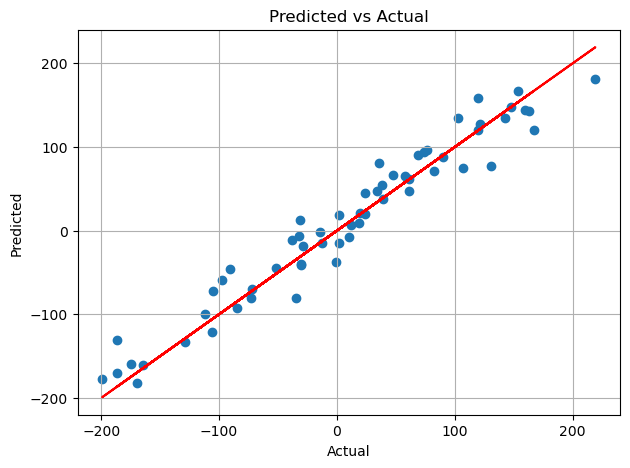

In [7]:
# Plot Predicted vs Actual values for visual evaluation

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()


The dots follow a rough diagonal trend → as actual values increase, your predicted values also increase.

➡️ This is exactly what a good regression model should do.

## **7. Residual Plot(Advance Part)**

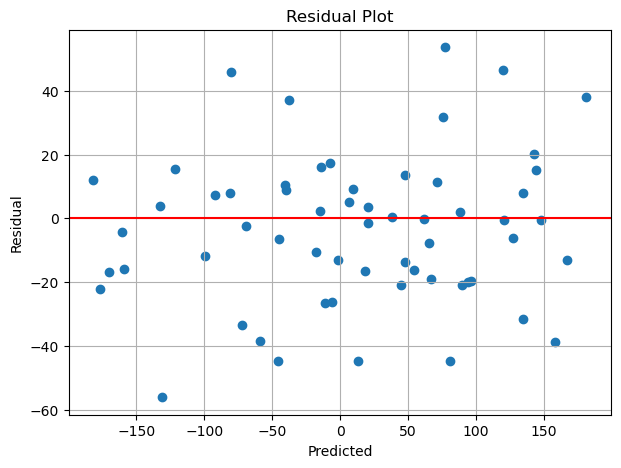

In [8]:
# Plot Predicted vs Actual values for visual evaluation

residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


“A good residual plot looks like random noise around the zero line.
If there is no pattern, the model is predicting well.
Our residual plot looks random, so our Gradient Boosting model is performing correctly.”

## **8. Feature Importance Plot**

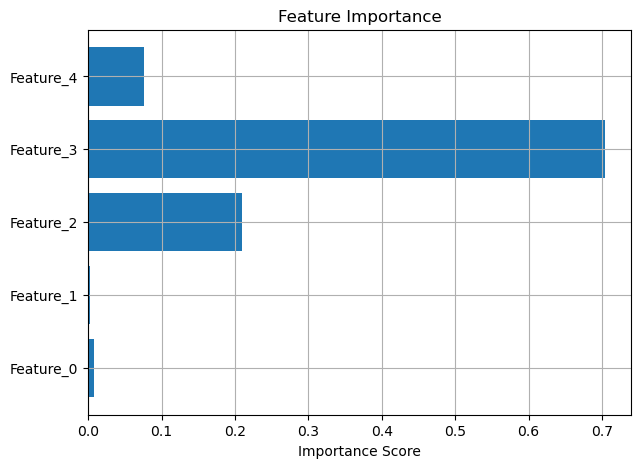

In [9]:
# Plot feature importance to understand which features matter most

importances = gbr.feature_importances_
feature_names = X.columns

plt.figure(figsize=(7,5))
plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.grid(True)
plt.show()


“This plot tells us which features the model relies on the most. A bigger bar means the feature has a stronger impact on the prediction.”

## **9. Learning Curve: Deviance (Training Loss)**

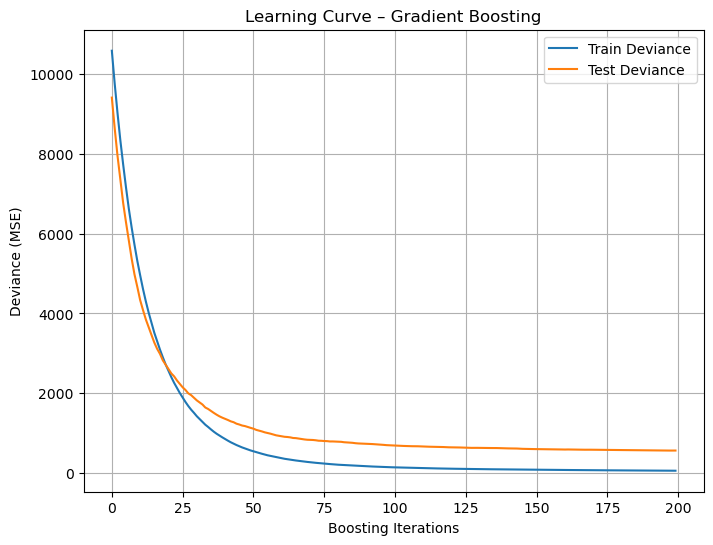

In [10]:
# Calculate evaluation metrics: MSE, RMSE, and R2 score

test_deviance = []
train_deviance = []

for y_pred_train in gbr.staged_predict(X_train):
    train_deviance.append(mean_squared_error(y_train, y_pred_train))

for y_pred_test in gbr.staged_predict(X_test):
    test_deviance.append(mean_squared_error(y_test, y_pred_test))

plt.figure(figsize=(8,6))
plt.plot(train_deviance, label="Train Deviance")
plt.plot(test_deviance, label="Test Deviance")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance (MSE)")
plt.title("Learning Curve – Gradient Boosting")
plt.legend()
plt.grid(True)
plt.show()


“This learning curve shows how Gradient Boosting improves step-by-step. Both training and test error drop fast and stay close, which means the model is learning well without overfitting.”

## **10. Final Notes for Students**


- Gradient Boosting improves the model **in small steps**.  
- Each tree corrects the errors of the previous trees.  
- Lower learning rate = slower but more accurate.  
- Too many trees can overfit; monitor the learning curve.  
- Feature importance helps interpret the model.  
